In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns    

In [2]:
df = pd.read_csv('AEP_hourly.csv')

In [3]:
df.head(10)

,Datetime,AEP_MW
0,12/31/2004 1:00,13478
1,12/31/2004 2:00,12865
2,12/31/2004 3:00,12577
3,12/31/2004 4:00,12517
4,12/31/2004 5:00,12670
5,12/31/2004 6:00,13038
6,12/31/2004 7:00,13692
7,12/31/2004 8:00,14297
8,12/31/2004 9:00,14719
9,12/31/2004 10:00,14941


In [5]:
df.tail(
)

,Datetime,AEP_MW
121268,1/1/2018 20:00,21089
121269,1/1/2018 21:00,20999
121270,1/1/2018 22:00,20820
121271,1/1/2018 23:00,20415
121272,1/2/2018 0:00,19993


In [6]:
df = df.set_index('Datetime')

In [7]:
pd.to_datetime(df.index)

DatetimeIndex(['2004-12-31 01:00:00', '2004-12-31 02:00:00',
               '2004-12-31 03:00:00', '2004-12-31 04:00:00',
               '2004-12-31 05:00:00', '2004-12-31 06:00:00',
               '2004-12-31 07:00:00', '2004-12-31 08:00:00',
               '2004-12-31 09:00:00', '2004-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=121273, freq=None)

In [11]:
df.index = pd.to_datetime(df.index)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Datetime  121273 non-null  object
 1   AEP_MW    121273 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [9]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

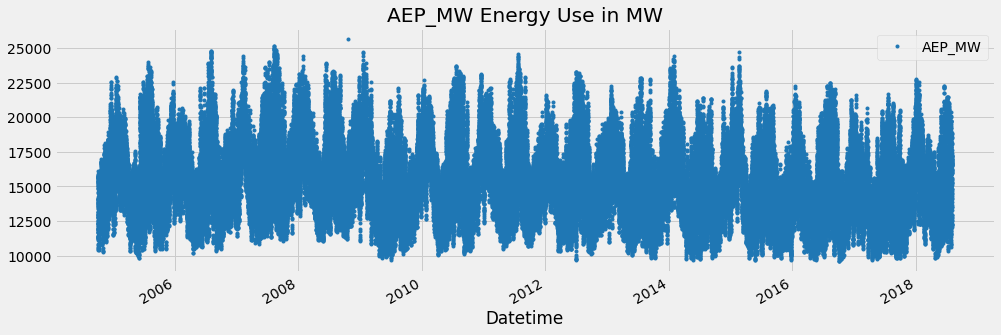

In [39]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='AEP_MW Energy Use in MW')
plt.show()

# Train Test split 

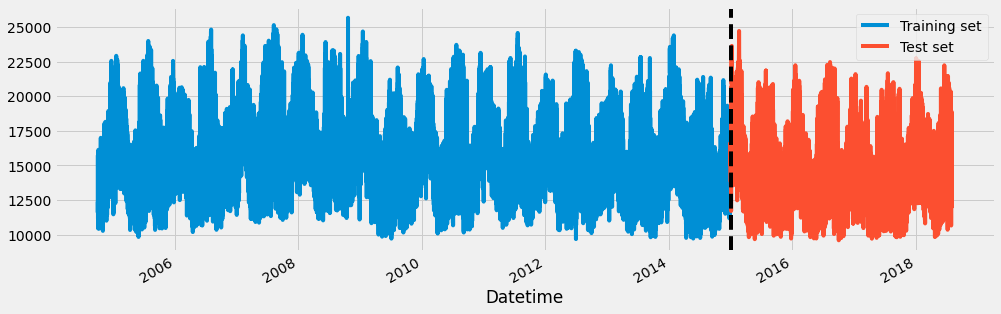

In [15]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']
fid , ax = plt.subplots(figsize = (15,5))
train.plot(ax = ax ,label= 'Training set' )
test.plot(ax = ax , label = 'Test set')
ax.axvline('01-01-2015',color = 'black',ls = '--')
ax.legend(['Training set','Test set'])
plt.show()

## Feature Engineering

In [17]:
# addidng new cloumn for the hour 
df.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            15, 16, 17, 18, 19, 20, 21, 22, 23,  0],
           dtype='int64', name='Datetime', length=121273)

In [18]:
df['hour'] = df.index.hour 
df['dayofweek'] = df.index.day_of_week

In [19]:
df.head(10)

,AEP_MW,hour,dayofweek
Datetime,,,
2004-12-31 01:00:00,13478,1,4
2004-12-31 02:00:00,12865,2,4
2004-12-31 03:00:00,12577,3,4
2004-12-31 04:00:00,12517,4,4
2004-12-31 05:00:00,12670,5,4
2004-12-31 06:00:00,13038,6,4
2004-12-31 07:00:00,13692,7,4
2004-12-31 08:00:00,14297,8,4
2004-12-31 09:00:00,14719,9,4


In [20]:
df.index.dayofweek

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
           dtype='int64', name='Datetime', length=121273)

### Days explain 
Monday = 0
sunday = 6

In [21]:
def create_fetaures(df):
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    
    return df 

In [24]:
df = create_fetaures(df)

In [25]:
df.head(10)

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2004-12-31 01:00:00,13478,1,4,4,12,2004,366
2004-12-31 02:00:00,12865,2,4,4,12,2004,366
2004-12-31 03:00:00,12577,3,4,4,12,2004,366
2004-12-31 04:00:00,12517,4,4,4,12,2004,366
2004-12-31 05:00:00,12670,5,4,4,12,2004,366
2004-12-31 06:00:00,13038,6,4,4,12,2004,366
2004-12-31 07:00:00,13692,7,4,4,12,2004,366
2004-12-31 08:00:00,14297,8,4,4,12,2004,366
2004-12-31 09:00:00,14719,9,4,4,12,2004,366


### visualize feature / Target relation 

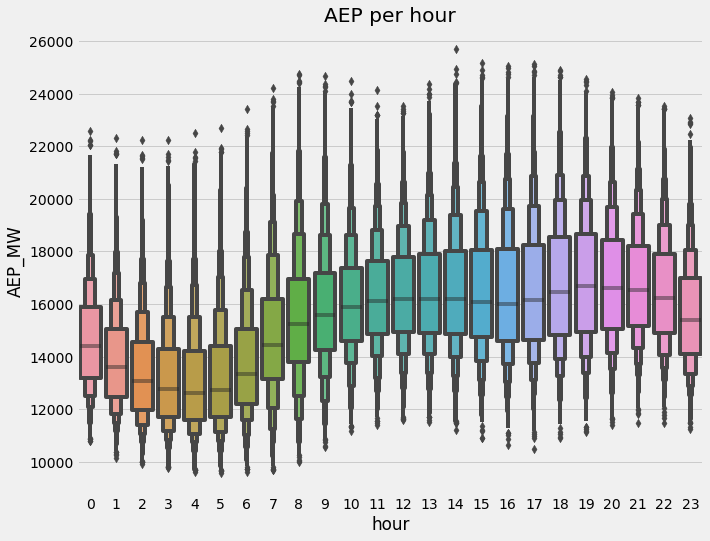

In [31]:
fig , ax = plt.subplots(figsize=(10,8))
sns.boxenplot(data=df , x = 'hour' , y = 'AEP_MW')
ax.set_title('AEP per hour')
plt.show()

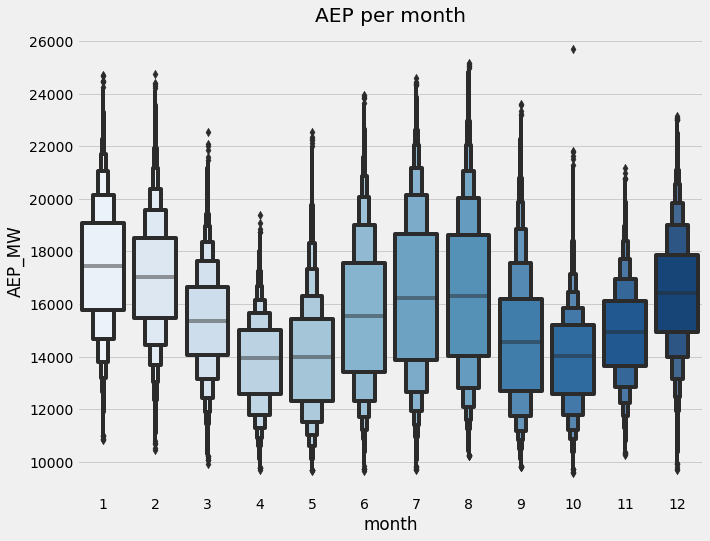

In [41]:
# checking distrbaution of the summer 
fig , ax = plt.subplots(figsize=(10,8))
sns.boxenplot(data=df , x = 'month' , y = 'AEP_MW' , palette = 'Blues')
ax.set_title('AEP per month')
plt.show()

<AxesSubplot:ylabel='Frequency'>

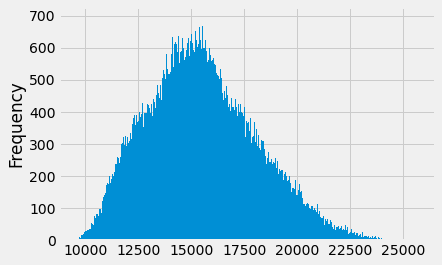

In [83]:
df['AEP_MW'].plot(kind = 'hist',bins = 500)

## Implement the Mpdel 

In [45]:
# splitting the features into train and test 
train = create_fetaures(train)
test = create_fetaures(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'AEP_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

<ipython-input-21-1ff59427702d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
<ipython-input-21-1ff59427702d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
<ipython-input-21-1ff59427702d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [50]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators = 1000 , early_stopping_rounds = 50 , learning_rate = 0.01) # checking the number of trees and to stop if 
reg.fit(X_train , y_train,
      eval_set = [(X_train , y_train),(X_test , y_test)] , verbose = True)

[0]	validation_0-rmse:15792.50936	validation_1-rmse:14861.30366
[1]	validation_0-rmse:15636.20419	validation_1-rmse:14705.33290
[2]	validation_0-rmse:15481.47246	validation_1-rmse:14551.16445
[3]	validation_0-rmse:15328.30578	validation_1-rmse:14398.32078
[4]	validation_0-rmse:15176.68124	validation_1-rmse:14247.27182
[5]	validation_0-rmse:15026.58805	validation_1-rmse:14097.75235
[6]	validation_0-rmse:14878.01342	validation_1-rmse:13949.69948
[7]	validation_0-rmse:14730.93562	validation_1-rmse:13802.98723
[8]	validation_0-rmse:14585.34977	validation_1-rmse:13658.07271
[9]	validation_0-rmse:14441.22845	validation_1-rmse:13514.33140
[10]	validation_0-rmse:14298.56380	validation_1-rmse:13372.65180
[11]	validation_0-rmse:14157.34559	validation_1-rmse:13231.73202
[12]	validation_0-rmse:14017.54981	validation_1-rmse:13092.92068
[13]	validation_0-rmse:13879.16285	validation_1-rmse:12954.70937
[14]	validation_0-rmse:13742.20108	validation_1-rmse:12818.34442
[15]	validation_0-rmse:13606.58808	

[129]	validation_0-rmse:4541.83675	validation_1-rmse:3859.31798
[130]	validation_0-rmse:4500.68845	validation_1-rmse:3822.31442
[131]	validation_0-rmse:4460.04213	validation_1-rmse:3785.83795
[132]	validation_0-rmse:4419.87975	validation_1-rmse:3747.99114
[133]	validation_0-rmse:4380.13310	validation_1-rmse:3713.08005
[134]	validation_0-rmse:4340.67616	validation_1-rmse:3677.08732
[135]	validation_0-rmse:4301.67715	validation_1-rmse:3643.54332
[136]	validation_0-rmse:4263.22652	validation_1-rmse:3607.11269
[137]	validation_0-rmse:4225.05185	validation_1-rmse:3573.58548
[138]	validation_0-rmse:4187.43763	validation_1-rmse:3539.99478
[139]	validation_0-rmse:4150.18928	validation_1-rmse:3505.47454
[140]	validation_0-rmse:4113.38523	validation_1-rmse:3472.52436
[141]	validation_0-rmse:4076.95330	validation_1-rmse:3439.98681
[142]	validation_0-rmse:4040.83663	validation_1-rmse:3405.79476
[143]	validation_0-rmse:4005.12517	validation_1-rmse:3374.76799
[144]	validation_0-rmse:3969.83804	valid

[258]	validation_0-rmse:1752.25224	validation_1-rmse:1664.20265
[259]	validation_0-rmse:1743.89227	validation_1-rmse:1660.48666
[260]	validation_0-rmse:1735.37325	validation_1-rmse:1657.11690
[261]	validation_0-rmse:1726.71321	validation_1-rmse:1653.81561
[262]	validation_0-rmse:1718.69130	validation_1-rmse:1650.19130
[263]	validation_0-rmse:1710.76005	validation_1-rmse:1646.79834
[264]	validation_0-rmse:1702.51832	validation_1-rmse:1643.01066
[265]	validation_0-rmse:1694.81904	validation_1-rmse:1639.76967
[266]	validation_0-rmse:1687.05306	validation_1-rmse:1637.36015
[267]	validation_0-rmse:1679.58218	validation_1-rmse:1634.23466
[268]	validation_0-rmse:1671.66731	validation_1-rmse:1631.49382
[269]	validation_0-rmse:1664.22999	validation_1-rmse:1629.32478
[270]	validation_0-rmse:1656.54058	validation_1-rmse:1626.77217
[271]	validation_0-rmse:1649.53101	validation_1-rmse:1623.97794
[272]	validation_0-rmse:1642.04880	validation_1-rmse:1621.58749
[273]	validation_0-rmse:1635.24089	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### checking the feature importance 

<AxesSubplot:title={'center':'Features importance'}>

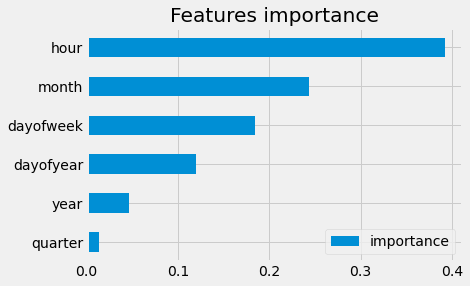

In [57]:
FI = pd.DataFrame(data = reg.feature_importances_,
            index=reg.feature_names_in_,columns = ['importance'])
FI.sort_values('importance').plot(kind='barh',title = 'Features importance')

In [58]:
from sklearn.metrics import mean_squared_error

In [60]:
test ['predection'] = reg.predict(X_test)

<ipython-input-60-278ddd3afcd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test ['predection'] = reg.predict(X_test)


In [64]:
df = df.merge(test[['predection']],how='left',left_index = True , right_index = True )
df

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,predection_x,predection_y
Datetime,,,,,,,,,
2004-10-01 01:00:00,12379,1,4,4,10,2004,275,NaN,NaN
2004-10-01 02:00:00,11935,2,4,4,10,2004,275,NaN,NaN
2004-10-01 03:00:00,11692,3,4,4,10,2004,275,NaN,NaN
2004-10-01 04:00:00,11597,4,4,4,10,2004,275,NaN,NaN
2004-10-01 05:00:00,11681,5,4,4,10,2004,275,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673,20,3,3,8,2018,214,17768.119141,17768.119141
2018-08-02 21:00:00,17303,21,3,3,8,2018,214,17768.119141,17768.119141
2018-08-02 22:00:00,17001,22,3,3,8,2018,214,17613.013672,17613.013672


In [65]:
df = df.drop('predection_y', axis=1)
df

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,predection_x
Datetime,,,,,,,,
2004-10-01 01:00:00,12379,1,4,4,10,2004,275,NaN
2004-10-01 02:00:00,11935,2,4,4,10,2004,275,NaN
2004-10-01 03:00:00,11692,3,4,4,10,2004,275,NaN
2004-10-01 04:00:00,11597,4,4,4,10,2004,275,NaN
2004-10-01 05:00:00,11681,5,4,4,10,2004,275,NaN
...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673,20,3,3,8,2018,214,17768.119141
2018-08-02 21:00:00,17303,21,3,3,8,2018,214,17768.119141
2018-08-02 22:00:00,17001,22,3,3,8,2018,214,17613.013672


In [77]:
df.to_csv('results.csv')

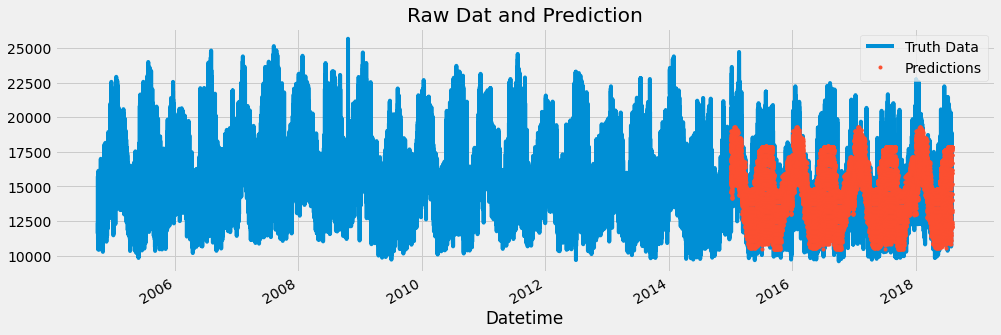

In [68]:
ax = df[['AEP_MW']].plot(figsize=(15, 5))
df['predection_x'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

#### comparing one week 

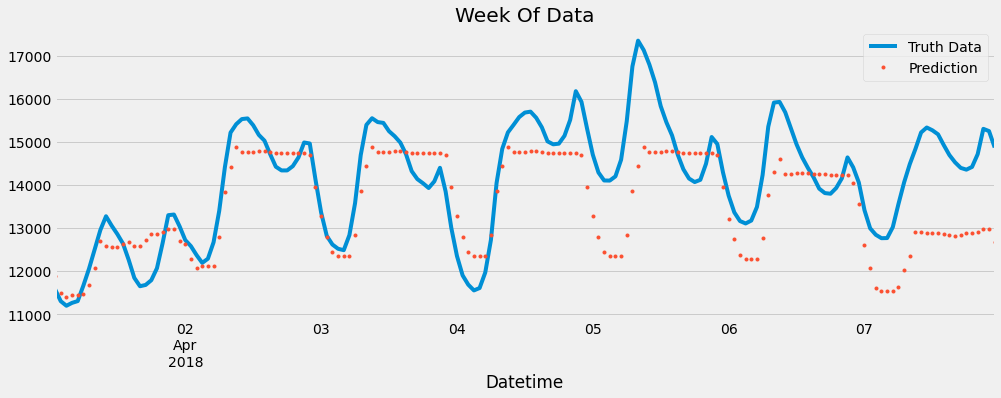

In [69]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['AEP_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['predection_x'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [72]:
score = np.sqrt(mean_squared_error(test['AEP_MW'], test['predection']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 1564.08


In [74]:
test['error'] = np.abs(test[TARGET] - test['predection'])

<ipython-input-74-19023c1e6719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test[TARGET] - test['predection'])


In [75]:
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

<ipython-input-75-c8477985b819>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = test.index.date


date
2015-02-20    5444.133789
2015-02-19    5358.522949
2018-01-06    5089.786133
2018-01-07    4698.032715
2017-12-31    4365.473145
2015-02-16    4330.623535
2017-01-22    4145.269531
2015-01-08    4061.021973
2017-12-28    3999.065674
2017-01-08    3937.605225
Name: error, dtype: float32

In [79]:
from datetime import datetime, timedelta
last_date = df.index[-1]
next_month = last_date + timedelta(days=30)
index = pd.date_range(start=next_month, periods=30, freq='D')

In [82]:
df.tail()

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,predection_x
Datetime,,,,,,,,
2018-08-02 20:00:00,17673,20,3,3,8,2018,214,17768.119141
2018-08-02 21:00:00,17303,21,3,3,8,2018,214,17768.119141
2018-08-02 22:00:00,17001,22,3,3,8,2018,214,17613.013672
2018-08-02 23:00:00,15964,23,3,3,8,2018,214,16164.030273
2018-08-03 00:00:00,14809,0,4,3,8,2018,215,13985.592773


In [84]:
# predecting for 1 year into the future 
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5,test_size = 24*356*1, gap =24)

In [85]:
df = df.sort_index()

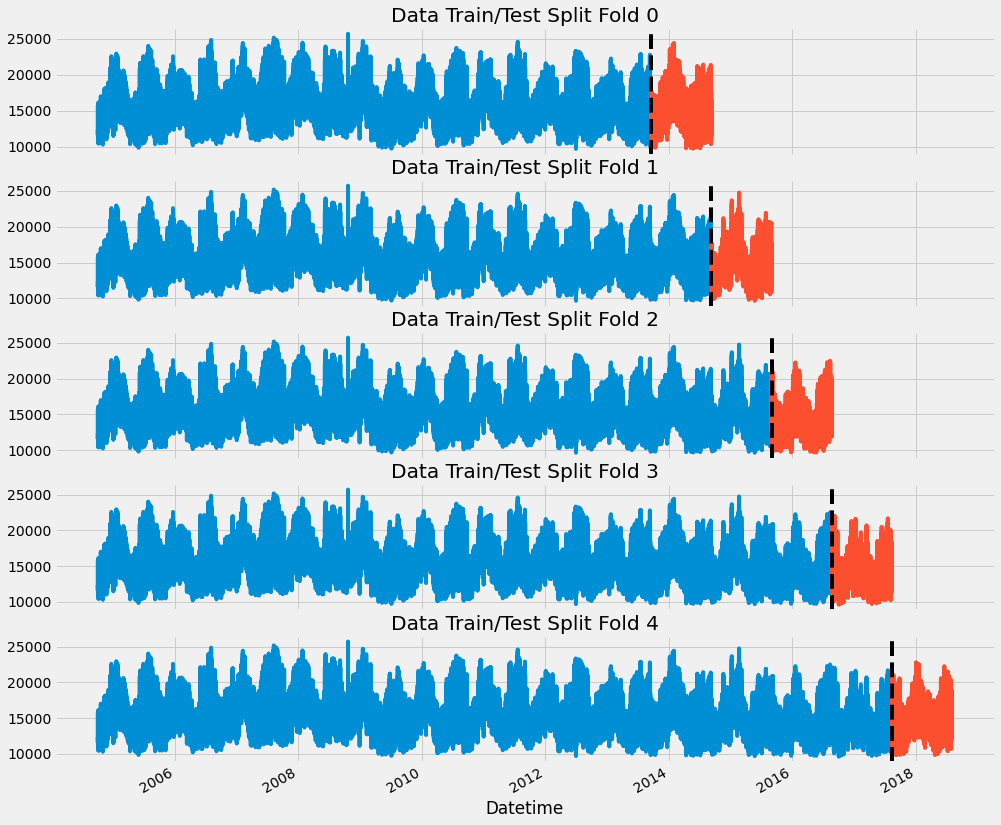

In [92]:
fig , axs = plt.subplots(5,1,figsize = (15,15),sharex = True)
fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['AEP_MW'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['AEP_MW'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [93]:
df.index.max()

Timestamp('2018-08-03 00:00:00')

In [102]:
# create furure data frame 
future = pd.date_range('2018-08-03','2019-08-01',freq='1h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_fetaures(df_and_future)
df_and_future = predection_x(df_and_future)

NameError: name 'predection_x' is not defined

In [99]:
future_w_features = df_and_future.query('isFuture').copy()

In [101]:
future_w_features.tail()

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,predection_x,isFuture
2019-07-31 20:00:00,NaN,20,2,3,7,2019,212,NaN,True
2019-07-31 21:00:00,NaN,21,2,3,7,2019,212,NaN,True
2019-07-31 22:00:00,NaN,22,2,3,7,2019,212,NaN,True
2019-07-31 23:00:00,NaN,23,2,3,7,2019,212,NaN,True
2019-08-01 00:00:00,NaN,0,3,3,8,2019,213,NaN,True
